# Adult Census Income Data Analysis

##  Data Acquisition

### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Load the data
df = pd.read_csv('adult.csv',na_values=['?','??'])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data exploration

In [17]:
# Check the dimensions (number of rows and columns) of the DataFrame
df.shape

(32561, 15)

In [18]:
# Displaying descriptive statistics of numerical columns in the DataFrame
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
#Counts the frequency of each income category in the 'income' column of the DataFrame 'df'
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [21]:
# Count occurrences of each value in 'sex' column
df['gender'].value_counts()

gender
Male      21790
Female    10771
Name: count, dtype: int64

In [22]:
# Count the occurrences of each country in the 'native.country' column
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [23]:
# Count the occurrences of each category in the 'workclass' column
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [24]:
# Count the occurrences of each unique value in the 'occupation' column
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

# Data cleaning


### Dropping Education- Education No. is enough, Final Weight- Highly Discrete Data so not useful

In [25]:
df = df.drop(['education', 'fnlwgt'], axis = 1)
df.head(1)

,age,workclass,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [26]:
missing=df.isnull().sum()
print(missing)

age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
gender               0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


### Cleaning all the missing values

In [27]:
columns_to_check = ["workclass", "occupation", "native.country"]
data_cleaned = df.dropna(subset=columns_to_check)
print("Shape of DataFrame after removing missing values:", data_cleaned.shape)
count= data_cleaned.isna().sum()
print(count)
count1=data_cleaned.isna().sum().sum()


print("Total Number of missing values after Cleaning: ")
print(count1)
df.head()

Shape of DataFrame after removing missing values: (30162, 13)
age               0
workclass         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
gender            0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Total Number of missing values after Cleaning: 
0


,age,workclass,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
#Forward fill NaN values in the DataFrame
df.ffill(inplace=True)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Replacing NaN with Forward Fill

### Drop rows with missing values (NaN) from the DataFrame

In [30]:
df.dropna(inplace=True)
df.head(15)

,age,workclass,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K
10,45,Private,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K


### Label Encoding Categorical Variables
#### Convert categorical variables to numeric using LabelEncoder

In [31]:
#Replaces the original text labels with numerical labels using the LabelEncoder
le = LabelEncoder()
categorical_columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'gender', 'native.country', 'income']

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
print("Cleaned Dataset Information:")
print(df.info())

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 32560 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int32
 2   education.num   32560 non-null  int64
 3   marital.status  32560 non-null  int32
 4   occupation      32560 non-null  int32
 5   relationship    32560 non-null  int32
 6   race            32560 non-null  int32
 7   gender          32560 non-null  int32
 8   capital.gain    32560 non-null  int64
 9   capital.loss    32560 non-null  int64
 10  hours.per.week  32560 non-null  int64
 11  native.country  32560 non-null  int32
 12  income          32560 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 2.5 MB
None


In [32]:
#encodes specific categorical columns in the DataFrame, transforming them from text labels to numerical labels
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['gender'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income,sex
1,82,3,9,6,3,1,4,0,0,4356,18,38,0,0
2,66,3,10,6,3,4,2,0,0,4356,40,38,0,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0,0
5,34,3,9,0,7,4,4,0,0,3770,45,38,0,0


# Exploratory data analyis

### Descriptive Statistics for Numeric Columns 

In [33]:
#calculates summary statistics for the numerical columns in the DataFrame
numeric_stats = df.describe()
print("Descriptive Statistics for Numeric Columns:")
print(numeric_stats)

Descriptive Statistics for Numeric Columns:
                age     workclass  education.num  marital.status  \
count  32560.000000  32560.000000   32560.000000    32560.000000   
mean      38.580068      3.102611      10.080713        2.611732   
std       13.637665      1.136688       2.572753        1.506128   
min       17.000000      0.000000       1.000000        0.000000   
25%       28.000000      3.000000       9.000000        2.000000   
50%       37.000000      3.000000      10.000000        2.000000   
75%       48.000000      3.000000      12.000000        4.000000   
max       90.000000      7.000000      16.000000        6.000000   

         occupation  relationship          race        gender  capital.gain  \
count  32560.000000  32560.000000  32560.000000  32560.000000  32560.000000   
mean       5.966861      1.446376      3.665848      0.669226   1077.681941   
std        4.024836      1.606794      0.848817      0.470499   7385.403083   
min        0.000000      0.

### Analyzing the Distribution of 'education.num'

In [34]:
#provides valuable insights into the distribution of education levels among adults
education_num_counts = df['education.num'].value_counts()
print("\nValue Counts for 'education.num':")
print(education_num_counts)


Value Counts for 'education.num':
education.num
9     10500
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64


### Create a contingency table to explore the relationship between 'gender' and 'income'

In [35]:
#explore the relationship between 'gender' and 'income'
cross_tab_gender_income = pd.crosstab(df['gender'], df['income'])
print("\nCross-tabulation for 'gender' and 'income':")
print(cross_tab_gender_income)


Cross-tabulation for 'gender' and 'income':
income      0     1
gender             
0        9591  1179
1       15128  6662


### Explore the relationship between race and income categories


In [36]:
#relationship between race and income categories
cross_tab_race_income = pd.crosstab(df['race'], df['income'])
print("\nCross-tabulation for 'race' and 'income':")
print(cross_tab_race_income)


Cross-tabulation for 'race' and 'income':
income      0     1
race               
0         275    36
1         763   276
2        2737   387
3         246    25
4       20698  7117


### Calculate and Display Correlation Matrix for Numeric Columns

In [37]:
#revealing how the numeric columns in the data are statistically related to each other. 
#-1: Perfect negative correlation(as one variable increases, the other decreases perfectly)
#0: No linear relationship
#+1: Perfect positive correlation(as one variable increases, the other increases perfectly)
correlation_matrix = df.corr()
print("\nCorrelation Matrix for Numeric Columns:")
print(correlation_matrix)


Correlation Matrix for Numeric Columns:
                     age  workclass  education.num  marital.status  \
age             1.000000   0.040880       0.036584       -0.266627   
workclass       0.040880   1.000000       0.000308       -0.018008   
education.num   0.036584   0.000308       1.000000       -0.069281   
marital.status -0.266627  -0.018008      -0.069281        1.000000   
occupation     -0.006434   0.010343       0.083771        0.022217   
relationship   -0.263723  -0.054944      -0.094157        0.185485   
race            0.028679   0.045406       0.031844       -0.068046   
gender          0.089019   0.068060       0.012262       -0.129230   
capital.gain    0.077708   0.031103       0.122629       -0.043387   
capital.loss    0.056658   0.003740       0.080198       -0.034982   
hours.per.week  0.068775   0.035204       0.148123       -0.190532   
native.country -0.001154  -0.001508       0.089086       -0.022969   
income          0.234155   0.000849       0.33514

# Data Visualization

### Line plot for Average Income by Work Class

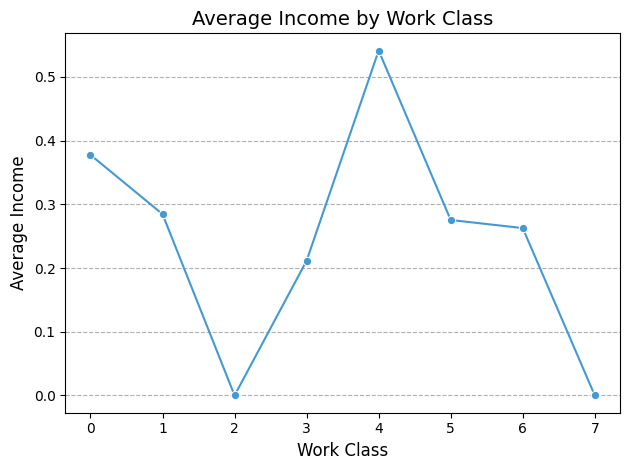

In [38]:
workclass_data = df.groupby('workclass')['income'].mean()  # Calculate average income by workclass
dark_skyblue1 = '#4299d4'

sns.lineplot(
    x=workclass_data.index,
    y=workclass_data.values,
    marker='o',  
    color=dark_skyblue1  
)
plt.title('Average Income by Work Class', fontsize=14)
plt.xlabel('Work Class', fontsize=12)
plt.ylabel('Average Income', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.tight_layout()
plt.show()

### Scatter Plot for Capital Loss vs. Hours Worked per Week by Income

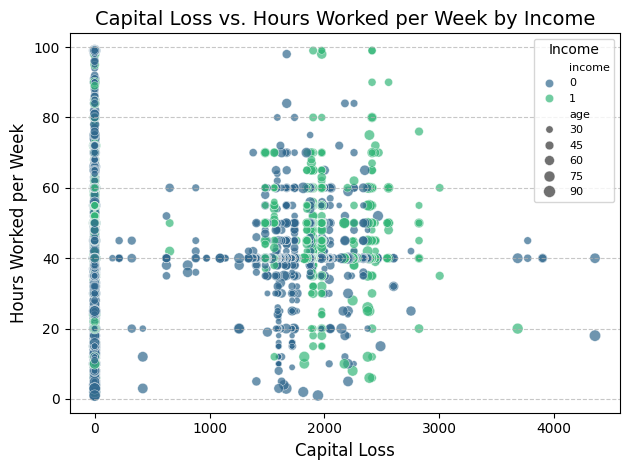

In [40]:
sns.scatterplot(
    x="capital.loss",  
    y="hours.per.week",
    hue="income", 
    palette="viridis",  
    data=df,
    alpha=0.7,  
    size="age", 
)

plt.title("Capital Loss vs. Hours Worked per Week by Income", fontsize=14)
plt.xlabel("Capital Loss", fontsize=12) 
plt.ylabel("Hours Worked per Week", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Income", loc="upper right", fontsize=8) 

# Improved display
plt.tight_layout()
plt.show()

### Barplot for 'income' vs 'age'

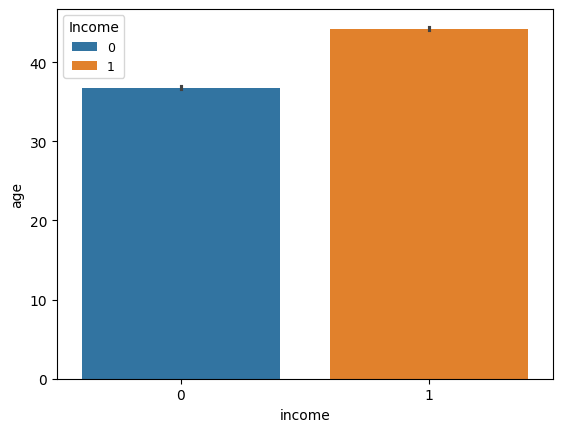

In [41]:
sns.barplot(x = 'income', y = 'age', hue='income', data = df)
plt.legend(title="Income", loc='upper left', fontsize=9) 


### Histogram for 'age'

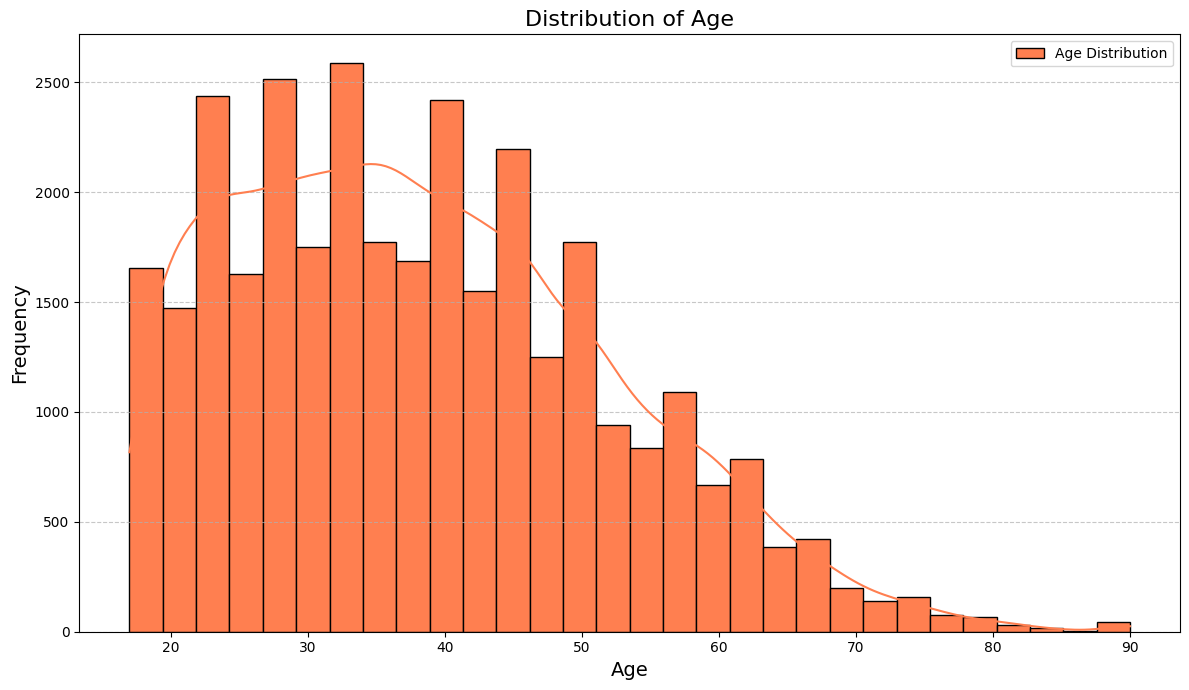

In [42]:
plt.figure(figsize=(12, 7))

sns.histplot(
    df['age'], bins=30, kde=True, color="coral", alpha=1.0 , label="Age Distribution")

plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Histogram for 'education.num'

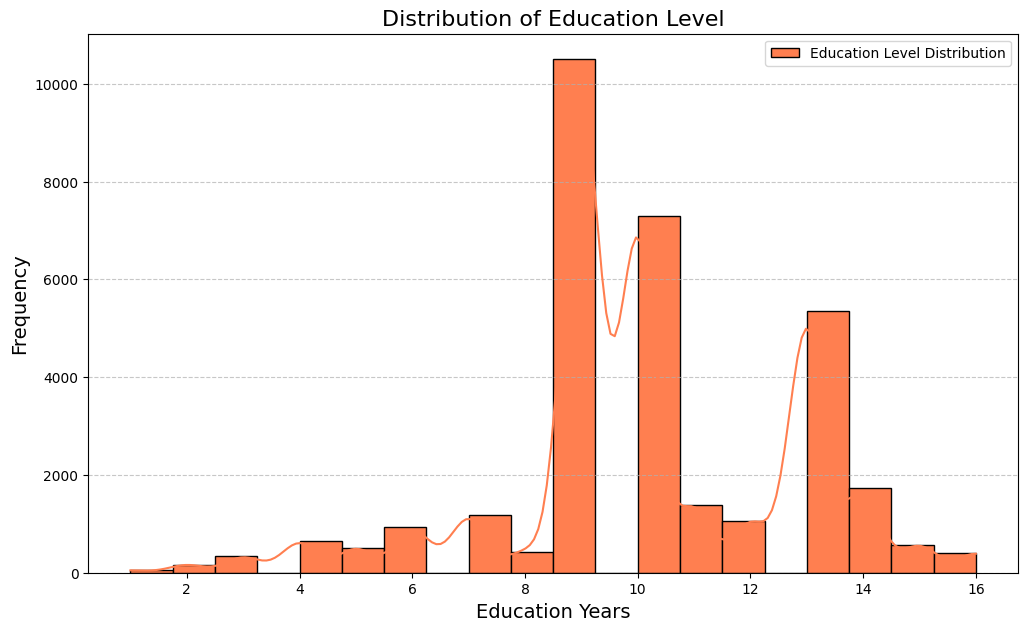

In [43]:
plt.figure(figsize=(12, 7))
sns.histplot(
    df["education.num"],
    bins=20,
    kde=True,
    color="coral",  # Or any other desired color
    alpha=1.0,
    label="Education Level Distribution",
)
plt.title("Distribution of Education Level", fontsize=16)
plt.xlabel("Education Years", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

### Count plot for 'race'

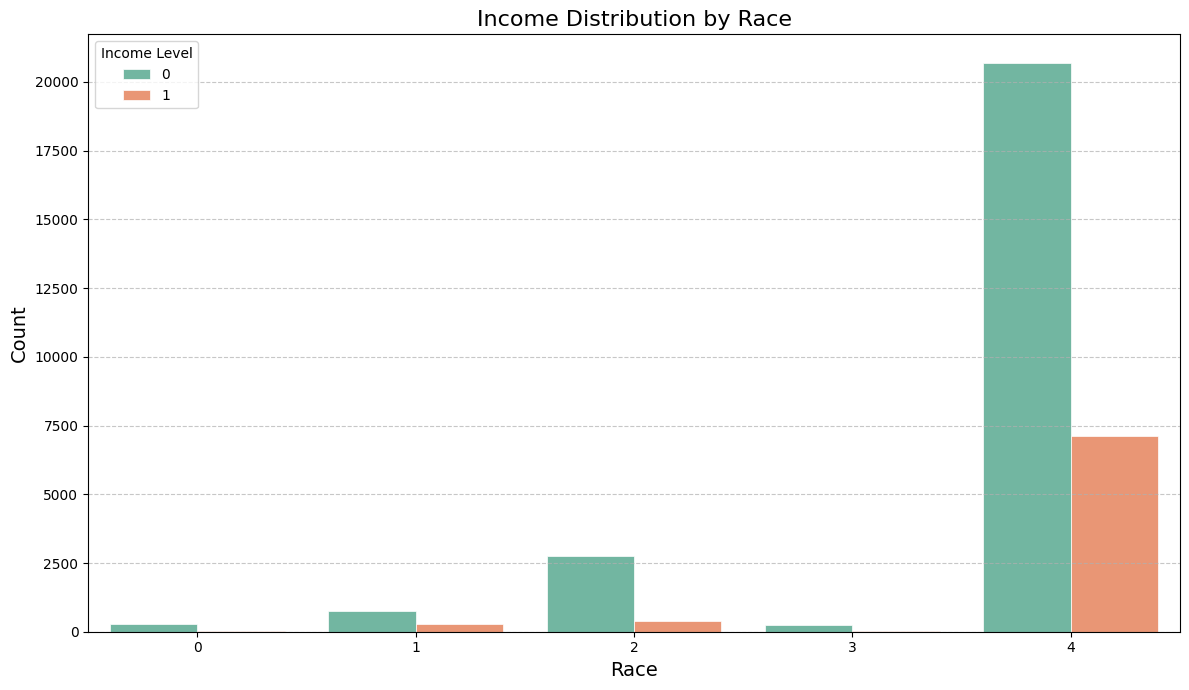

In [44]:
plt.figure(figsize=(12, 7))

sns.countplot(
    x="race", hue="income", data=df, palette="Set2", edgecolor="white", linewidth=0.5
)
plt.title("Income Distribution by Race", fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Income Level", loc="upper left")  # Move legend inside plot

plt.tight_layout()
plt.show()

### Count Plot for 'Relationship status'

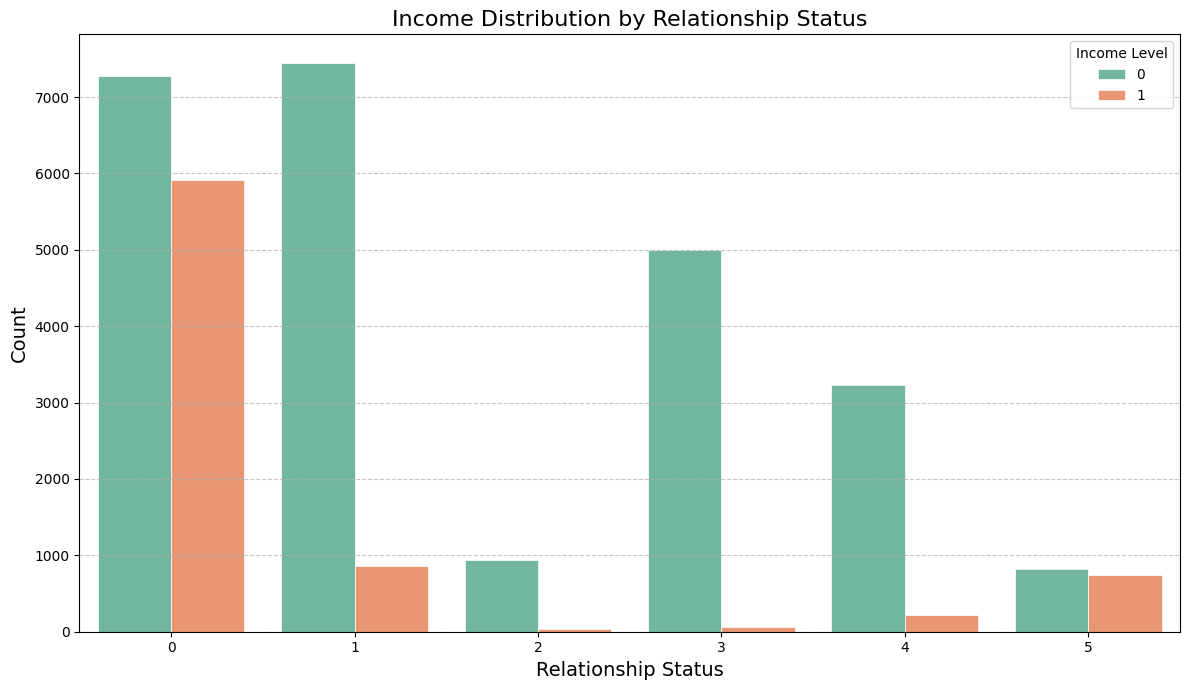

In [45]:
plt.figure(figsize=(12, 7))
sns.countplot(
    x="relationship", hue="income", data=df, palette="Set2", edgecolor="white", linewidth=0.5
)
plt.title("Income Distribution by Relationship Status", fontsize=16)
plt.xlabel("Relationship Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Income Level", loc="upper right")  
plt.tight_layout()
plt.show()

### Box plot for 'hours.per.week'

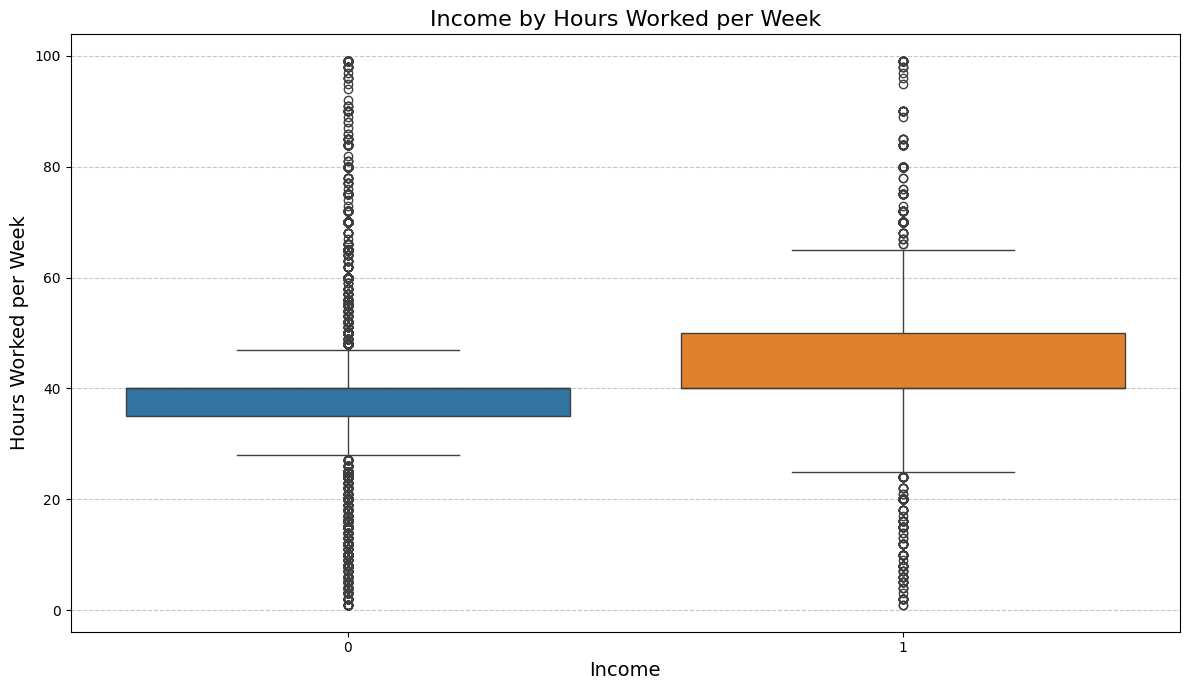

In [46]:
plt.figure(figsize=(12, 7))

sns.boxplot(
    x="income",
    y="hours.per.week",
    hue="income",  
    data=df,
    legend=False,  
)

plt.title("Income by Hours Worked per Week", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Hours Worked per Week", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()